# Trabalho de Análise Preditiva:






1.0 Importando bibliotecas:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline






1.1 Importando Arquivo (.csv) Teste:

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving df_train2.csv to df_train2.csv


In [ ]:
df_train = pd.read_csv('df_train2.csv')

1.2 Observando Dataset para identificar colunas, linhas e que tipo de dados estou trabalhando.

In [ ]:
df_train.columns

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'LotArea',
       'HalfBath', 'SalePrice'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2.0 Iniciando a limpeza dos dados:


In [ ]:
df_train.isnull().sum()

OverallQual     0
GrLivArea       0
GarageArea      0
TotalBsmtSF     0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
OpenPorchSF     0
WoodDeckSF      0
2ndFlrSF        0
LotArea         0
HalfBath        0
SalePrice       0
dtype: int64

In [ ]:
df_train.isnull().sum()
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
total = df_train.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
OverallQual,0,0.0
Fireplaces,0,0.0
HalfBath,0,0.0
LotArea,0,0.0
2ndFlrSF,0,0.0
WoodDeckSF,0,0.0
OpenPorchSF,0,0.0
BsmtFinSF1,0,0.0
MasVnrArea,0,0.0
GrLivArea,0,0.0


2.1 Devido à porcentagem de campos vazios dessas colunas, decidi excluí-las

In [ ]:
df_train.drop([''], axis =1, inplace = True )

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1338 non-null   int64  
 1   GrLivArea     1338 non-null   int64  
 2   GarageArea    1338 non-null   int64  
 3   TotalBsmtSF   1338 non-null   int64  
 4   FullBath      1338 non-null   int64  
 5   TotRmsAbvGrd  1338 non-null   int64  
 6   YearBuilt     1338 non-null   int64  
 7   YearRemodAdd  1338 non-null   int64  
 8   MasVnrArea    1338 non-null   float64
 9   Fireplaces    1338 non-null   int64  
 10  BsmtFinSF1    1338 non-null   int64  
 11  OpenPorchSF   1338 non-null   int64  
 12  WoodDeckSF    1338 non-null   int64  
 13  2ndFlrSF      1338 non-null   int64  
 14  LotArea       1338 non-null   int64  
 15  HalfBath      1338 non-null   int64  
 16  SalePrice     1338 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 177.8 KB


2.2 Em seguida, exclui as linhas que possuem campos vazios. Dessa forma, fiquei com um Dataset de 76 colunas e 1338 linhas.

In [ ]:
df_train.dropna(inplace=True)
df_train.reset_index(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1338 non-null   int64  
 1   OverallQual   1338 non-null   int64  
 2   GrLivArea     1338 non-null   int64  
 3   GarageArea    1338 non-null   int64  
 4   TotalBsmtSF   1338 non-null   int64  
 5   FullBath      1338 non-null   int64  
 6   TotRmsAbvGrd  1338 non-null   int64  
 7   YearBuilt     1338 non-null   int64  
 8   YearRemodAdd  1338 non-null   int64  
 9   MasVnrArea    1338 non-null   float64
 10  Fireplaces    1338 non-null   int64  
 11  BsmtFinSF1    1338 non-null   int64  
 12  OpenPorchSF   1338 non-null   int64  
 13  WoodDeckSF    1338 non-null   int64  
 14  2ndFlrSF      1338 non-null   int64  
 15  LotArea       1338 non-null   int64  
 16  HalfBath      1338 non-null   int64  
 17  SalePrice     1338 non-null   int64  
dtypes: float64(1), int64(17)
mem

2.3 Na sequência, observei quais são as colunas mais correlacionadas com o Target (SalePrice)


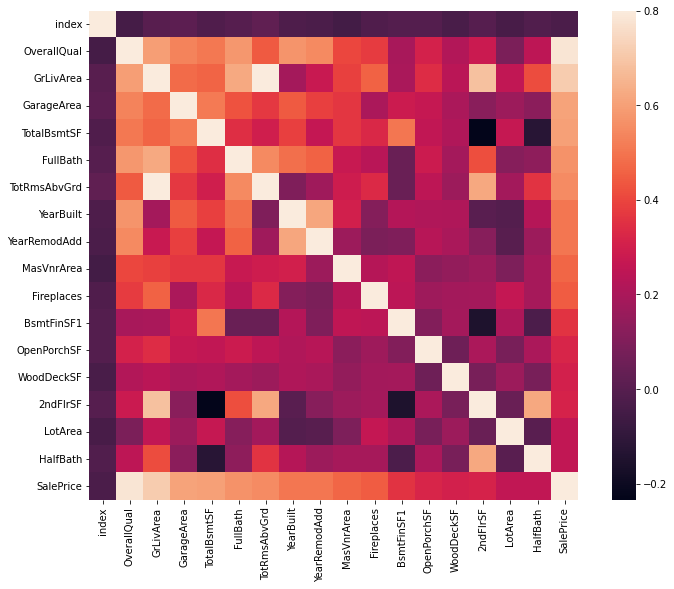

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

<Figure size 2880x2880 with 0 Axes>

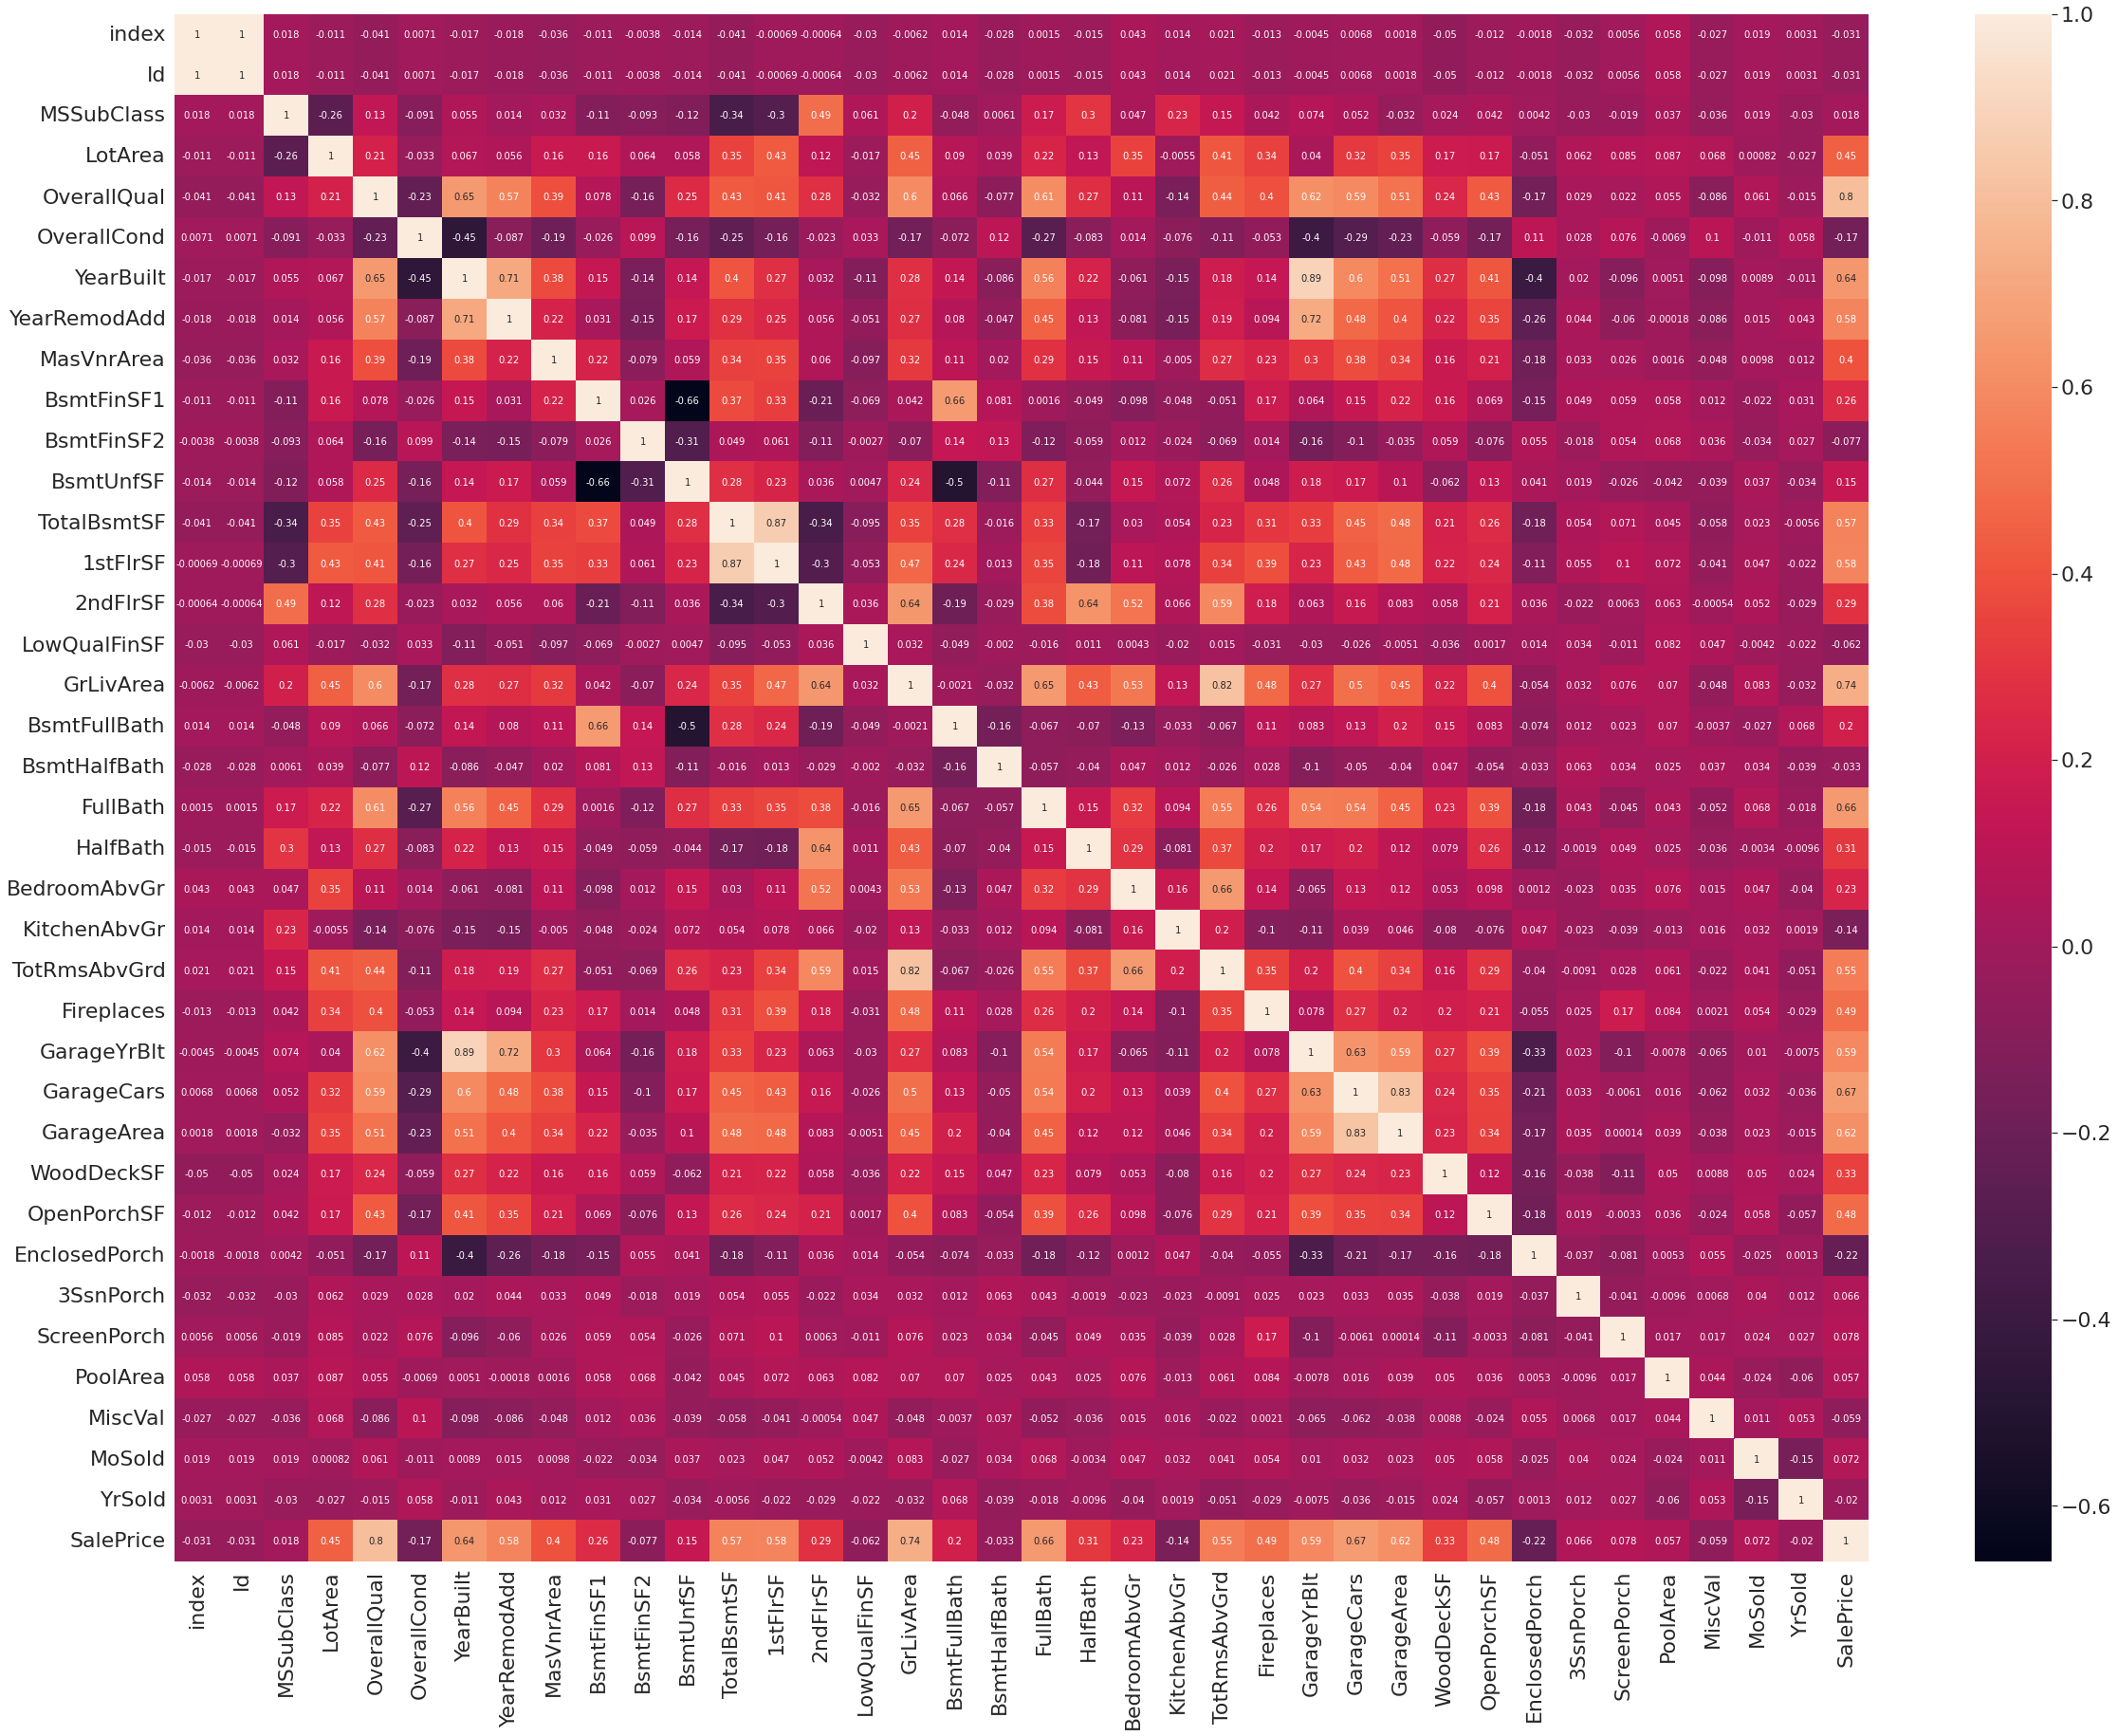

In [ ]:
plt.figure(figsize=(40,40))
f, ax = plt.subplots(figsize=(40, 30))
corr = df_train.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

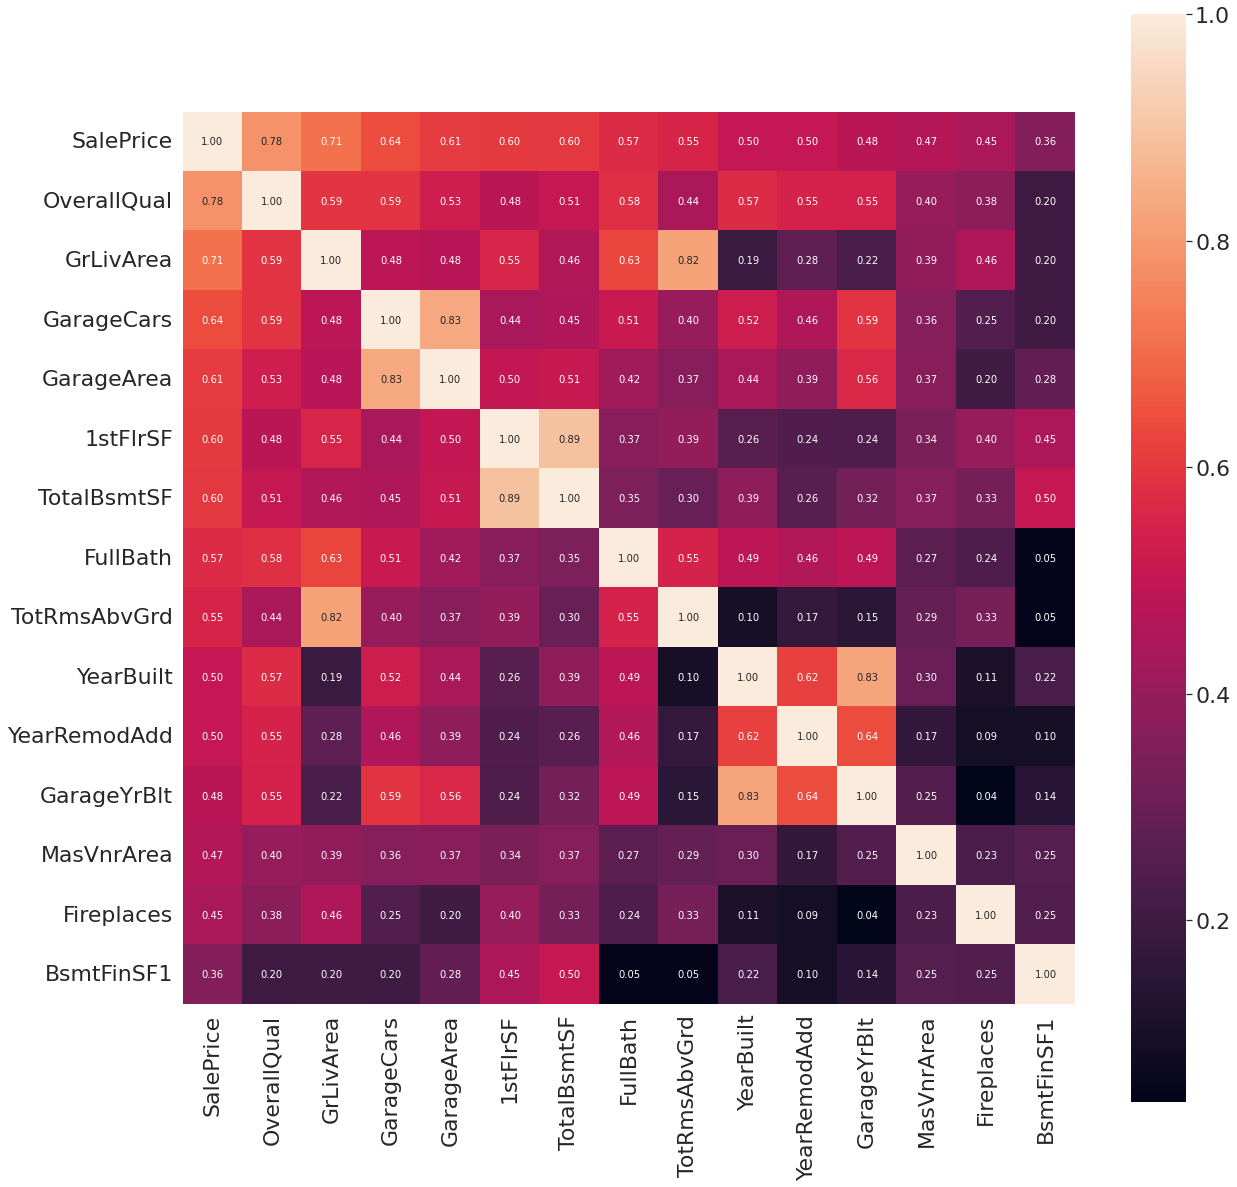

In [ ]:
plt.figure(figsize=(20,20))
k = 15 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

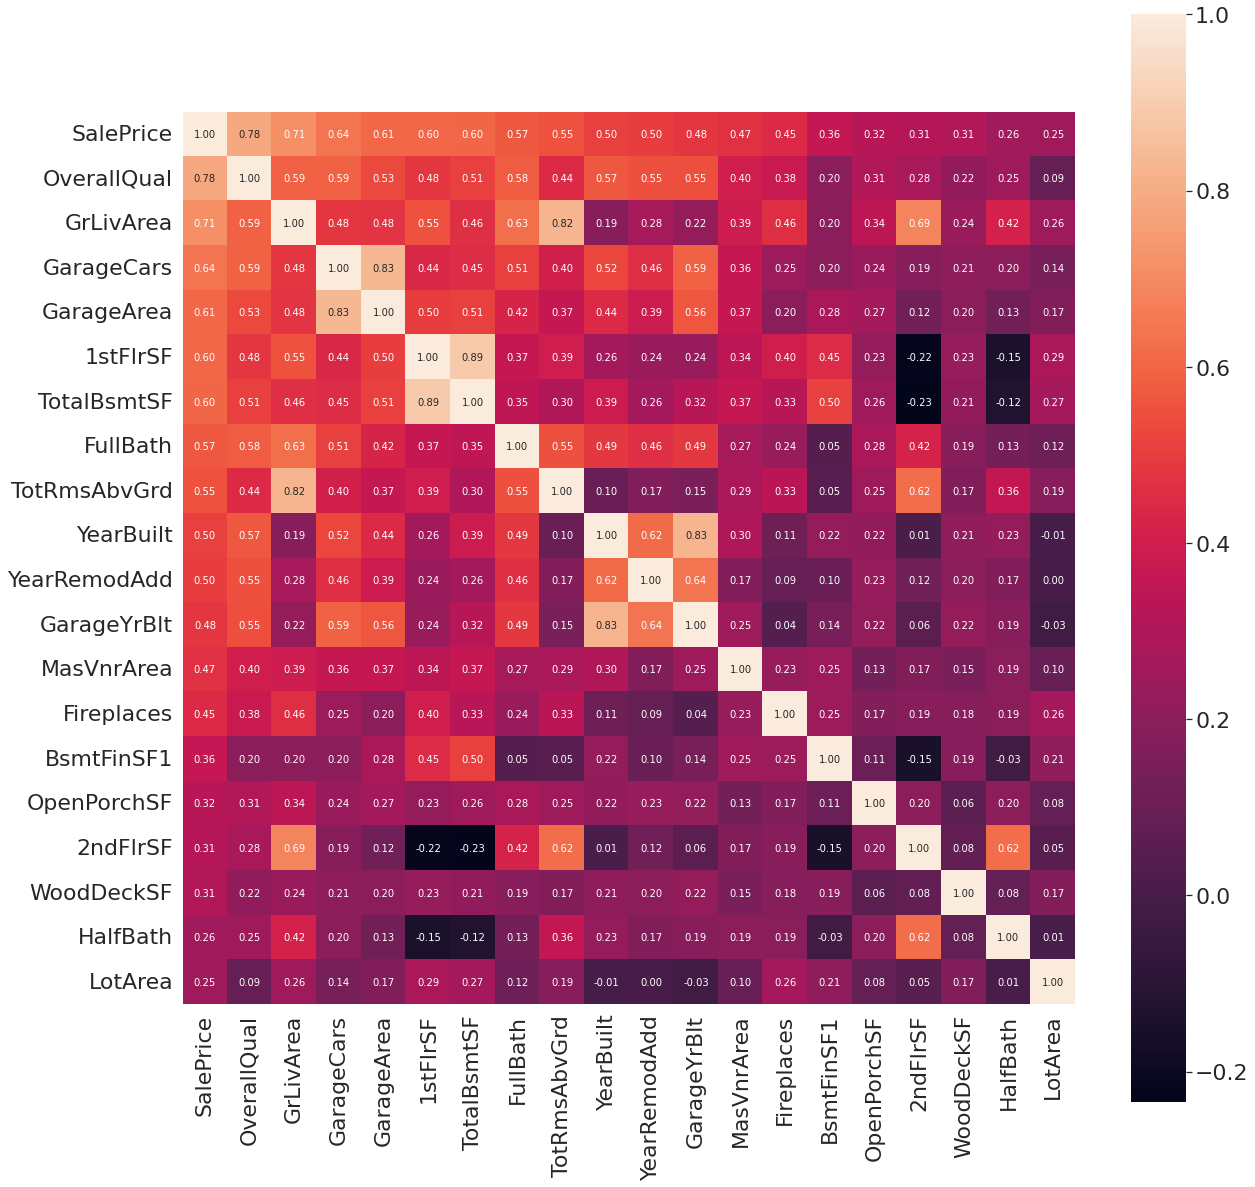

In [ ]:
plt.figure(figsize=(20,20))
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

2.4 Assim selecionamos 17 colunas, sendo uma a do nosso Target e 16 colunas  

In [ ]:
df_train2 = df_train.loc[:, ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'LotArea', 'HalfBath', 'SalePrice']]

1 - OverallQual: Avaliação geral do material e acabamento da casa (CATEGÓRICO)

2 - GrLivArea: Área habitável acima do solo (pés quadrados)

3 - GarageArea: Tamanho da garagem (pés quadrados)

4 - TotalBsmtSF: área do porão (pés quadrados)

5 - Banheiros completos acima do nível

6 - TotRmsAbvGrd: Total de comodos acima do nível do solo (não inclui banheiros)

7 - YearBuilt: Ano de Construção

8 - YearRemodAdd: Data de remodelação (igual à data de construção se não houver remodelação ou acréscimos)

9 - MasVnrArea: Área de revestimento de alvenaria (pés quadrados)

10 - FirePlaces: Número de lareiras

11 - BsmtFinSF1: Acabamento do porão

12 - OpenPorchSF: Área de varanda aberta (pés quadrados)

13 - WoodDeckSF: Área do deck de madeira (pés quadrados)

14 - 2ndFlrSF: Área do segundo andar (pés quadrados) 

15 - LotArea: tamanho do lote (pés quadrados) 

16 - HalfBath: Número de lavabos acima do nível da terra.

17 - SalePrice: Valor de Venda

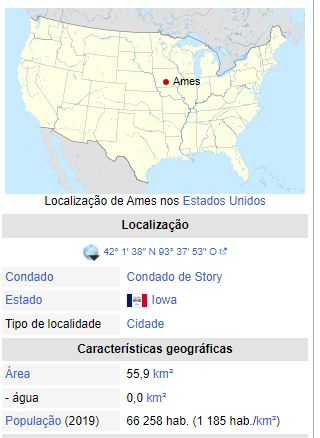

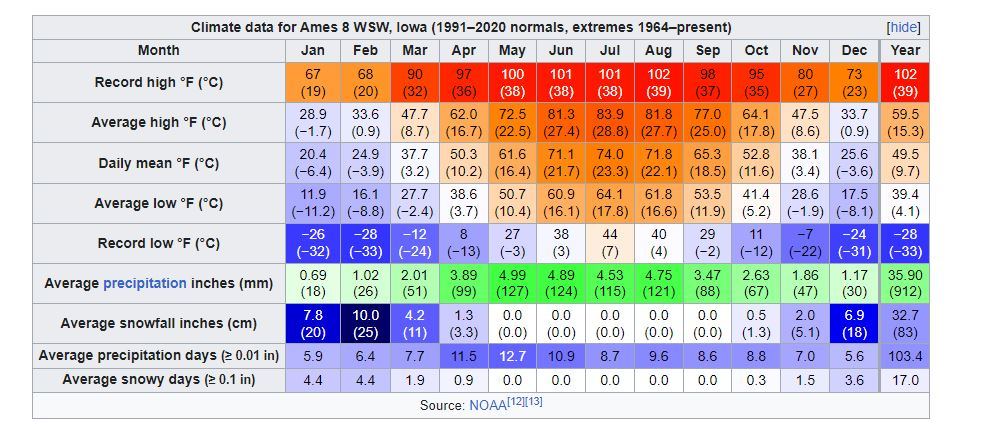

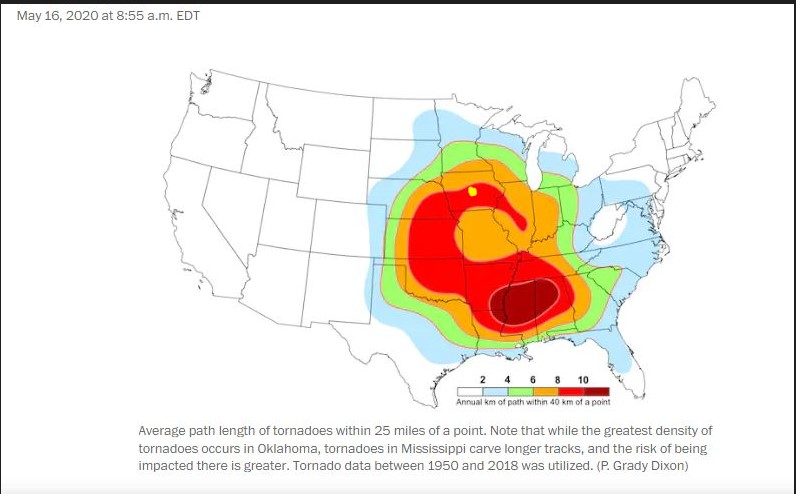

In [ ]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1338 non-null   int64  
 1   GrLivArea     1338 non-null   int64  
 2   GarageArea    1338 non-null   int64  
 3   TotalBsmtSF   1338 non-null   int64  
 4   FullBath      1338 non-null   int64  
 5   TotRmsAbvGrd  1338 non-null   int64  
 6   YearBuilt     1338 non-null   int64  
 7   YearRemodAdd  1338 non-null   int64  
 8   MasVnrArea    1338 non-null   float64
 9   Fireplaces    1338 non-null   int64  
 10  BsmtFinSF1    1338 non-null   int64  
 11  OpenPorchSF   1338 non-null   int64  
 12  WoodDeckSF    1338 non-null   int64  
 13  2ndFlrSF      1338 non-null   int64  
 14  LotArea       1338 non-null   int64  
 15  HalfBath      1338 non-null   int64  
 16  SalePrice     1338 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 177.8 KB


In [ ]:
df_train2.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,OpenPorchSF,WoodDeckSF,2ndFlrSF,LotArea,HalfBath,SalePrice
0,7,1710,548,856,2,8,2003,2003,196.0,0,706,61,0,854,8450,1,208500
1,6,1262,460,1262,2,6,1976,1976,0.0,1,978,0,298,0,9600,0,181500
2,7,1786,608,920,2,6,2001,2002,162.0,1,486,42,0,866,11250,1,223500
3,7,1717,642,756,1,7,1915,1970,0.0,1,216,35,0,756,9550,0,140000
4,8,2198,836,1145,2,9,2000,2000,350.0,1,655,84,192,1053,14260,1,250000


3- Separação do conjunto de Treino e de Teste 

In [ ]:
x = df_train2.loc[:,['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'LotArea', 'HalfBath']]
y = df_train2.loc[:,['SalePrice']]

Primeiramente usei 70% para treino e 30% para teste


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
print(x.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1338, 16)
(936, 16)
(402, 16)
(936, 1)
(402, 1)


A seguir, a normalização com o método *p.MinMaxScaler*

In [ ]:
import numpy as np
from sklearn import preprocessing as p
min_max_scaler = p.MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.fit_transform(X_test)

In [ ]:
X_train_normalized

array([[0.375     , 0.16948501, 0.32114467, ..., 0.        , 0.04897053,
        0.        ],
       [0.625     , 0.58704842, 0.56438792, ..., 0.88038741, 0.07986165,
        0.        ],
       [0.375     , 0.09108378, 0.09141494, ..., 0.        , 0.04136577,
        0.        ],
       ...,
       [0.625     , 0.24577248, 0.19077901, ..., 0.2566586 , 0.05822992,
        0.5       ],
       [0.625     , 0.16122214, 0.290938  , ..., 0.        , 0.04359999,
        0.        ],
       [0.5       , 0.25980015, 0.25755167, ..., 0.37675545, 0.0425343 ,
        1.        ]])

Utilizei a Regressão Linear para nosso modelo de Predição


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_normalized, y_train)

LinearRegression()

Resultado da primeira tentativa.

In [ ]:
y_pred = model.predict(X_test_normalized)

from sklearn import metrics
model.score(X_train_normalized, y_train)
print('MAE: ',metrics.mean_absolute_error(y_pred, y_test))
print('MSE: ',metrics.mean_squared_error(y_pred, y_test))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R2 Score: ',metrics.r2_score(y_pred, y_test))

MAE:  35112.66066635688
MSE:  1956834733.1257384
RMSE:  44236.12475257907
R2 Score:  0.7481147855049897


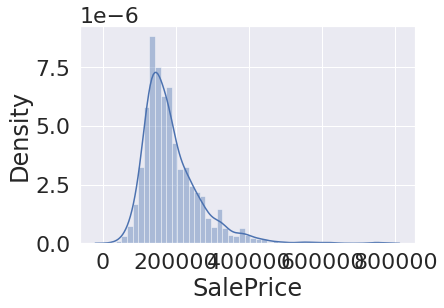

In [ ]:
sns.distplot(df_train['SalePrice'])

In [ ]:
df_train['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Comparando o resultado percebi que ainda podia melhorar o resultado.

Para essa nova rodada de testes useio o split de 80% train e 20% teste, além de modificar o metodo de normalização para StandardScaler

In [ ]:
a = df_train2.loc[:,['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF', 'LotArea', 'HalfBath']]
b = df_train2.loc[:,['SalePrice']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(a,b,test_size=0.2)

In [ ]:
print(a.shape)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1338, 16)
(1070, 16)
(268, 16)
(1070, 1)
(268, 1)


Agora a normalização via StandardScaler

In [ ]:
import numpy as np
from sklearn import preprocessing as p
min_max_scaler = StandardScaler()
X_train_normalized2 = min_max_scaler.fit_transform(X_train2)
X_test_normalized2 = min_max_scaler.fit_transform(X_test2)

In [ ]:
X_train_normalized2.shape

(1070, 16)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_normalized2, y_train2)

LinearRegression()

In [ ]:
y_pred2 = model.predict(X_test_normalized2)

from sklearn import metrics
model.score(X_train_normalized2, y_train2)
print('MAE: ',metrics.mean_absolute_error(y_pred2, y_test2))
print('MSE: ',metrics.mean_squared_error(y_pred2, y_test2))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_pred2, y_test2)))
print('R2 Score: ',metrics.r2_score(y_pred2, y_test2))

MAE:  22326.917807699752
MSE:  1098641755.1410074
RMSE:  33145.765267089664
R2 Score:  0.7481445216660337


Podemos observar que tivemos êxito nas implementações feitas. Conforme podemos ver abaixo:

# 1ª predição:                   

MAE:  35112.66066635688

MSE:  1956834733.1257384

RMSE:  44236.12475257907

R2 Score:  0.7481147855049897

# 2ª predição:

MAE:  22656.656548165785

MSE:  1407836362.9485698

RMSE:  37521.14554419374

R2 Score:  0.710256265487581



A seguir testamos outros metodos de predição

In [ ]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(a,b,test_size=0.2)

In [ ]:
print(a.shape)
print(X_train3.shape)
print(X_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(1338, 16)
(1070, 16)
(268, 16)
(1070, 1)
(268, 1)


In [ ]:
import numpy as np
from sklearn import preprocessing as p
min_max_scaler = StandardScaler()
X_train_normalized3 = min_max_scaler.fit_transform(X_train3)
X_test_normalized3 = min_max_scaler.fit_transform(X_test3)

Usamos agora a Regrassão de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train_normalized3, y_train3) 

RandomForestRegressor(random_state=0)

In [ ]:
y_pred3 = regressor.predict(X_test_normalized3)

from sklearn import metrics
regressor.score(X_train_normalized3, y_train3)
print('MAE: ',metrics.mean_absolute_error(y_pred3, y_test3))
print('MSE: ',metrics.mean_squared_error(y_pred3, y_test3))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_pred3, y_test3)))
print('R2 Score: ',metrics.r2_score(y_pred3, y_test3))


MAE:  18576.861131840797
MSE:  1070839551.5432867
RMSE:  32723.68487110348
R2 Score:  0.8052372915837236


Observou-se o êxito nas implementações feitas. Conforme podemos ver abaixo:

# 1ª predição:                   

MAE:  35112.66066635688

MSE:  1956834733.1257384

RMSE:  44236.12475257907

R2 Score:  0.7481147855049897

# 2ª predição:

MAE:  22656.656548165785

MSE:  1407836362.9485698

RMSE:  37521.14554419374

R2 Score:  0.710256265487581

# 3ª predição:

MAE:  18576.861131840797

MSE:  1070839551.5432867

RMSE:  32723.68487110348

R2 Score:  0.8052372915837236
